## Activity determination for *Rh*MOP against different oligo-mannosacharides

    Carried out on 220525, by Simon Birgersson and Mathias Wiemann


*Lund university, Center for Molecular Protein Science (CMPS), Henrik Stålbrand Group.*

*** 
**Purpose:**  

To determine acitivty for the *Rosburia hominis* mannophosporylase (*Rh*MOP) against different oligo-mannosacharides (MO:s).  
The idea is to see whether or not the enzyme prefers longer or shorter substrates, to fit into the discussion being prepared in the *R. hominis* cluster paper being constructed in the group currently.

    

* **Enzyme:** *Rh*MOP, stock from MW, 0.14 mg/ml in reaction
* **Substrate:** M2, M4, M5 10mM in reaction
* **Phosphate:** 10mM PO4 in reaction
* **Buffer:** 50mM Sodium Citrate pH 5.5
* **Time:** [0, 10] min sample points
* **Temperature:** T = 37°C
* **Absorbance** measured at  $\lambda$ = 620 nm
* Experiments carried out in 96 well sample plate


## Assay Protocol

1. Dilution of phosphate standard series. prepare 1 ml of 40 μM *Phosphate Premix solution* by mixing 40 μl of 1 mM phosphate standard solution with 960 μl of ultrapure H2O. Number each standard tube. Prepare 8 standard solution by mixing the *premix solution* and H2O according to the table below:

| # | Premix + H2O   | Final vol. [μl] | Phosphate conc [μM] | pmoles phosphate in 50 μl |
|---|----------------|-----------------|---------------------|---------------------------|
| 1 | 200 μl + 0 μl  | 200             | 40                  | 2.000                     |
| 2 | 160 μl + 40 μl | 200             | 32                  | 1.600                     |
| 3 | 120 μl + 80 μl | 200             | 24                  | 1.200                     |
| 4 | 80 μl + 120 μl | 200             | 16                  | 800                       |
| 5 | 60 μl + 140 μl | 200             | 12                  | 600                       |
| 6 | 40 μl + 160 μl | 200             | 8                   | 400                       |
| 7 | 20 μl + 180 μl | 200             | 4                   | 200                       |
| 8 | 0 μl + 200 μl  | 200             | 0                   | 0                         |

2. Transfer 50 μl of test sample (e.g, enzyme reaction) in duplicate into wells of the microplate. In the case of enzyme reactions, the reactions may be terminated by either adding a specific inhibitor or can be stopped directly by the addition of the *Malachite Green Reagent*. Reaction buffer can be added as a blank control for the samples.

3. Add 100 μl of the *Malachite Green Reagent* to each well. Mix by tapping the plate.

4. Incubate for 30 min at Room Temperature (RT)  for color development.

5. Measure absorbance at $\lambda$ = 600-660 nm on plate reader.

In [1]:
# initalization 
from utils.activity_assay import Standard,Enzyme # classes for storing data
import matplotlib.pyplot as plt # module for plotting data
import numpy as np # module for matrix operations
import pandas as pd

## Standard data
Here is where is input the standard data and handle raw data input, blanks, eventual points to remove, etc.

The class initilaztion will create std_name.fit, a regr object fitting the data to the equation:

$abs = c * slope + intercept$ 

and provide *slope* and *intercept* as callable variables, i.e "*std_name.fit.slope*"

In [2]:
# Standard data
# concentration values for standard series of PNP [uM]
std_c   = np.array([4,6,12,16,24,32,40])# [uM]

# raw data for std curve, absorbance values minus mean of blanks [AU]
std_abs = np.array([[0.266, 0.328, 0.406, 0.478, 0.621, 0.746, 0.904], [0.275, 0.332, 0.412, 0.487, 0.630, 0.780, 0.913]])-np.array([0.223, 0.243]).mean()

# initialize standard object with measured absorbances.          
std = Standard(
        absorbance=std_abs,
        concentration=std_c,
        x_unit="μM",
        y_unit="AU",
    )


print(std) # show data in "table"

Standard Data: 
    μM  abs #1  abs #2  mean [AU]  +/- [AU]
0   4   0.033   0.042     0.0375    0.0045
1   6   0.095   0.099     0.0970    0.0020
2  12   0.173   0.179     0.1760    0.0030
3  16   0.245   0.254     0.2495    0.0045
4  24   0.388   0.397     0.3925    0.0045
5  32   0.513   0.547     0.5300    0.0170
6  40   0.671   0.680     0.6755    0.0045  

Resulting std equation is:

    abs = c * 0.02 + -0.03

With an R^2 of 0.9986


## Sample data
Here I input the raw data for my sample, same here all the raw data processing is done here before analysis. The standard equation in std.fit is inputted to get fitted concentrations for the sample. 

In [3]:
# Sample data

# dilution factors of protein stock
sample_dil = np.array([8.1/0.14*125]) # dilution factor

# stock enzyme concentration
RhMOP_stock_conc = 8.1 # mg/ml

# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
RhMOP_M4_abs_0min  = np.array([[0.264],[0.261],[0.250]])-np.array([0.229,0.226]).mean() # [AU]
RhMOP_M4_abs_10min = np.array([[2.479],[1.792],[1.885]])-np.array([0.228,0.227]).mean() # [AU]

#initialize Enzyme objects
RhMOP_M4 = Enzyme(absorbance = RhMOP_M4_abs_10min - RhMOP_M4_abs_0min,
                Name= "RhMOP incubated with mannobiose",
                regr=std.fit,
                time=10.0,
                dilution_factor=sample_dil,
                x_unit = "μM",
            )

# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
RhMOP_M4_abs_0min_MW  = np.array([[0.235],[0.233],[0.236]])-np.array([0.233,0.236]).mean() # [AU]
RhMOP_M4_abs_10min_MW = np.array([[0.511],[0.515],[0.232]])-np.array([0.232,0.228]).mean() # [AU]

#initialize Enzyme objects
RhMOP_M4_MW = Enzyme(absorbance = RhMOP_M4_abs_10min_MW - RhMOP_M4_abs_0min_MW,
                Name= "RhMOP incubated with mannobiose MW",
                regr=std.fit,
                time=10.0,
                dilution_factor=sample_dil,
                x_unit = "μM",
            )

print(RhMOP_M4.df.T) # show data in "table"
print(RhMOP_M4_MW.df.T) # show data in "table"

                    RhMOP incubated with mannobiose
abs #1                                     2.215000
abs #2                                     1.531000
abs #3                                     1.635000
mean [AU]                                  1.793667
+/- [AU]                                   0.300938
conc. analyte [μM]                       104.444626
+/- [μM]                                  18.720884
activity [nkat/ml]                      1258.930755
+/- [nkat/ml]                              0.000000
                    RhMOP incubated with mannobiose MW
abs #1                                        0.280500
abs #2                                        0.286500
abs #3                                        0.000500
mean [AU]                                     0.189167
+/- [AU]                                      0.133430
conc. analyte [μM]                           12.302144
+/- [μM]                                      9.101322
activity [nkat/ml]                      

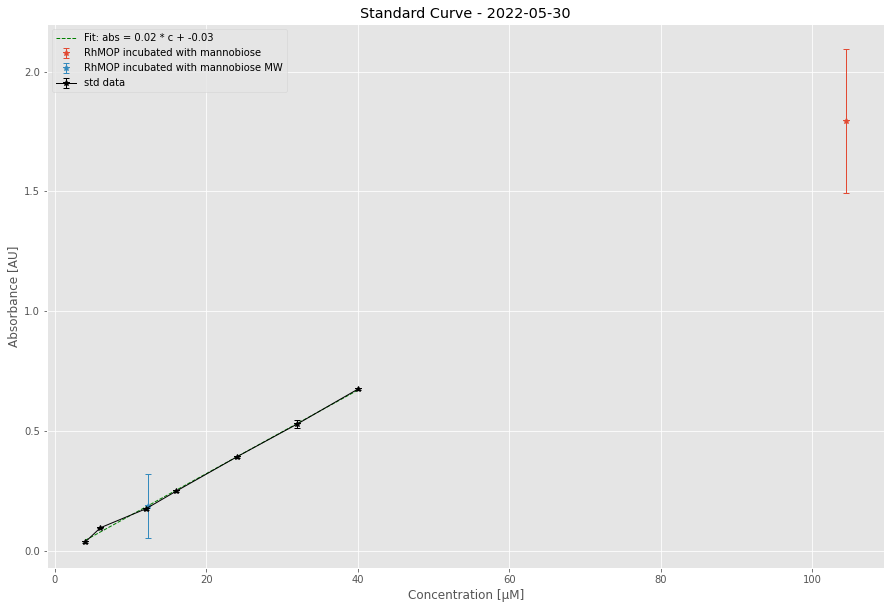

                    RhMOP incubated with mannobiose  \
abs #1                                     2.215000   
abs #2                                     1.531000   
abs #3                                     1.635000   
mean [AU]                                  1.793667   
+/- [AU]                                   0.300938   
conc. analyte [μM]                       104.444626   
+/- [μM]                                  18.720884   
activity [nkat/ml]                      1258.930755   
+/- [nkat/ml]                              0.000000   

                    RhMOP incubated with mannobiose MW  
abs #1                                        0.280500  
abs #2                                        0.286500  
abs #3                                        0.000500  
mean [AU]                                     0.189167  
+/- [AU]                                      0.133430  
conc. analyte [μM]                           12.302144  
+/- [μM]                                      9.10

In [4]:
# Print the results:
plt.figure(figsize=[15,10]) # create figure object
plt.style.use('ggplot')

 # plot sample data in current fig
RhMOP_M4.plot() 
RhMOP_M4_MW.plot() 

# plot std data in current fig
std.plot() 

# render figure object
plt.show() 

df = pd.DataFrame()
df[RhMOP_M4.name] = RhMOP_M4.df.transpose()
df[RhMOP_M4_MW.name] = RhMOP_M4_MW.df.transpose()
print(df)

## Conclusions
<p> 